In [4]:
def play(): 
    import numpy as np
    import simpleaudio as sa
    from itertools import repeat

    sargamdict = {"sa":261,
                 "re":294,
                 "ga":330,
                 "ma":349,
                 "pa":392,
                 "dha":440,
                 "ni":494,
                 "sa":515}

    def play_audio(audio):# normalize to 16-bit range
        audio *= 32767 / np.max(np.abs(audio))
        # convert to 16-bit data
        audio = audio.astype(np.int16)

        # start playback
        play_obj = sa.play_buffer(audio, 1, 2, sample_rate)

        # wait for playback to finish before exiting
        play_obj.wait_done()

    T = 0.25
    sample_rate = 44100
    TxS = int(T * sample_rate)
    t = np.linspace(0, T, TxS, endpoint=False)

    Sa_note = np.sin(sargamdict["sa"] * t * 3 * np.pi)
    Re_note = np.sin(sargamdict["re"] * t * 3 * np.pi)
    Ga_note = np.sin(sargamdict["ga"] * t * 3* np.pi)
    Ma_note = np.sin(sargamdict["ma"] * t * 3 * np.pi)
    Pa_note = np.sin(sargamdict["pa"] * t * 3 * np.pi)
    Dha_note = np.sin(sargamdict["dha"] * t * 3 * np.pi)
    Ni_note = np.sin(sargamdict["ni"] * t * 3 * np.pi)
    # Sa1_note = np.sin(sargamdict["sa1"] * t * 3 * np.pi)

    get_pause  = lambda seconds: repeat(0, int(seconds * sample_rate))
    pause_note=list(get_pause(0.01))

    sargam = np.hstack((Sa_note,pause_note,Re_note,pause_note,Ga_note,
                       pause_note,Ma_note, pause_note,Pa_note, pause_note,
                        Dha_note, pause_note,Ni_note, pause_note))

    import wavio
    fs = 44100
    s2 = np.append(sargam,sargam[::-1])

    file = "mp3/pythonsargam.wav"
    wavio.write(file, s2, fs, scale=None, sampwidth=2)

    from scipy import fft, arange
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.io import wavfile
    import os


    def frequency_sepectrum(x, sf):
        """
        Derive frequency spectrum of a signal from time domain
        :param x: signal in the time domain
        :param sf: sampling frequency
        :returns frequencies and their content distribution
        """
        x = x - np.average(x)  # zero-centering

        n = len(x)
        print(n)
        k = arange(n)
        tarr = n / float(sf)
        frqarr = k / float(tarr)  # two sides frequency range

        frqarr = frqarr[range(n // 2)]  # one side frequency range

        x = fft(x) / n  # fft computing and normalization
        x = x[range(n // 2)]

        return frqarr, abs(x)


    # Sine sample with a frequency of 1hz and add some noise
    sr = 32  # sampling rate
    y = np.linspace(0, 2*np.pi, sr)
    y = np.tile(np.sin(y), 5)
    y += np.random.normal(0, 1, y.shape)
    t = np.arange(len(y)) / float(sr)

    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')

    frq, X = frequency_sepectrum(y, sr)

    plt.subplot(2, 1, 2)
    plt.plot(frq, X, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')
    plt.tight_layout()


    # wav sample from https://freewavesamples.com/files/Alesis-Sanctuary-QCard-Crickets.wav
    # here_path = os.path.dirname(os.path.realpath(__file__))
    # wav_file_name = 'Alesis-Sanctuary-QCard-Crickets.wav'
    # wave_file_path = os.path.join(here_path, wav_file_name)

    wave_file_path = file
    sr, signal = wavfile.read(wave_file_path)

    y = signal[:]  # use the first channel (or take their average, alternatively)
    t = np.arange(len(y)) / float(sr)

    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')

    frq, X = frequency_sepectrum(y, sr)

    plt.subplot(2, 1, 2)
    plt.plot(frq, X, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')
    plt.tight_layout()

    plt.show()

160
160524


<ipython-input-4-13b8eeeff8c9>:72: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  k = arange(n)
<ipython-input-4-13b8eeeff8c9>:78: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  x = fft(x) / n  # fft computing and normalization
<ipython-input-4-13b8eeeff8c9>:72: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  k = arange(n)
<ipython-input-4-13b8eeeff8c9>:78: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  x = fft(x) / n  # fft computing and normalization


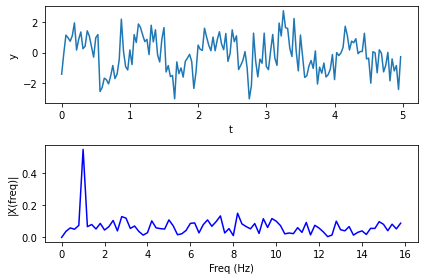

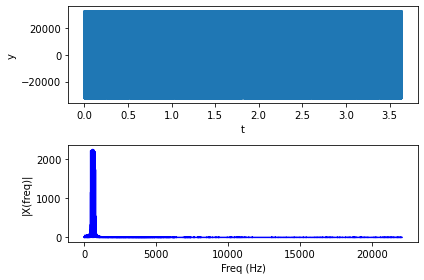

In [5]:
play()